In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from scipy.optimize import differential_evolution
from sklearn.metrics import mutual_info_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif
from scipy.stats import entropy
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
import warnings

In [3]:
# Suprimir un warning específico (por ejemplo, el warning de UserWarning)
warnings.filterwarnings("ignore", category=UserWarning)

In [4]:
##Visualizacion del dataset
df = pd.read_csv(r'rtfDataSet.csv', header=0)
df

,0,1,2,3,4,5,6,7,8,9,...,61,62,63,64,65,66,67,68,69,label
0,-0.536000,0.292000,-0.684000,0.123000,-0.118000,0.346000,-0.308000,-0.113000,0.401000,-0.399000,...,-0.135000,-0.063000,-0.410000,-0.223000,-0.599000,-0.136000,-0.329000,-0.132000,-0.266000,0
1,-0.496000,-0.298000,-0.529000,0.073000,-0.072000,0.107000,-0.316000,-0.066000,-0.168000,-0.099000,...,0.189000,0.007000,-0.362000,-0.151000,-0.338000,-0.031000,-0.159000,-0.097000,-0.131000,0
2,0.008000,-0.031000,-0.240000,0.178000,-0.120000,0.317000,-0.481000,0.031000,-0.077000,0.063000,...,-0.035000,0.101000,-0.098000,-0.172000,-0.290000,0.033000,-0.342000,-0.321000,-0.238000,0
3,-0.188000,-0.180000,-0.062000,-0.104000,-0.136000,-0.061000,-0.216000,-0.143000,0.068000,-0.189000,...,0.146000,-0.145000,-0.527000,-0.292000,-0.663000,-0.078000,-0.194000,-0.151000,-0.268000,0
4,0.038000,0.155000,-0.203000,-0.088000,-0.084000,-0.164000,-0.145000,-0.168000,0.008000,0.143000,...,0.019000,-0.084000,0.164000,-0.165000,-0.126000,-0.112000,0.029000,-0.138000,0.148000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
391,0.074967,-0.127350,-0.240811,-0.037584,0.035714,-0.431190,-0.154309,0.160049,-0.172790,0.146073,...,0.280726,-0.228779,0.195978,0.319949,0.521700,0.160157,0.226597,-0.052955,-0.098770,1
392,0.664006,-0.028111,-0.179418,-0.070884,0.048793,-0.001349,-0.187850,-0.000023,-0.260852,0.111592,...,-0.016521,-0.193006,0.130795,-0.001237,0.016746,-0.015542,0.273885,0.175237,-0.039909,1
393,-0.234197,-0.058229,-0.553610,-0.097793,-0.157780,0.226956,0.416572,-0.005744,-0.068708,-0.166337,...,0.231451,-0.174647,-0.396817,-0.260318,-0.440378,-0.063138,-0.386871,-0.627228,-0.142251,1
394,0.274072,-0.105900,0.203276,-0.061067,-0.100202,-0.404380,-0.085191,-0.036268,-0.253699,0.036598,...,0.157804,-0.054686,0.473430,0.117017,0.192226,0.084721,-0.029949,0.167364,0.000677,1


In [5]:
##Separacion en X y Y (utilizando)
X=df.iloc[:,:-1]
Y=df.iloc[:, -1]

#Objeto normalizador
scaler=MinMaxScaler()
#Se normaliza
X_norm=scaler.fit_transform(X)
#Visualizacion de X normalizado
X_norm = pd.DataFrame(X_norm)
X_norm


,0,1,2,3,4,5,6,7,8,9,...,60,61,62,63,64,65,66,67,68,69
0,0.294244,0.705043,0.183047,0.610883,0.287570,0.806475,0.179009,0.499009,0.890763,0.184259,...,0.448750,0.378264,0.459459,0.300824,0.339323,0.180758,0.348815,0.324151,0.526825,0.128294
1,0.315761,0.143673,0.263651,0.559548,0.330241,0.630611,0.174344,0.522299,0.433735,0.462037,...,0.462500,0.606916,0.529530,0.333791,0.389081,0.332945,0.448341,0.433056,0.543741,0.221914
2,0.586875,0.397716,0.413937,0.667351,0.285714,0.785136,0.078134,0.570367,0.506827,0.612037,...,0.530250,0.448836,0.623624,0.515110,0.374568,0.360933,0.509005,0.315823,0.435476,0.147712
3,0.481442,0.255947,0.506500,0.377823,0.270872,0.506990,0.232653,0.484143,0.623293,0.378704,...,0.464750,0.576570,0.377377,0.220467,0.291638,0.143440,0.403791,0.410634,0.517641,0.126907
4,0.603012,0.574691,0.433177,0.394251,0.319109,0.431199,0.274052,0.471754,0.575100,0.686111,...,0.475750,0.486944,0.438438,0.695055,0.379406,0.456560,0.371564,0.553491,0.523925,0.415395
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
391,0.622898,0.306042,0.413515,0.446012,0.430161,0.234592,0.268624,0.634316,0.429888,0.688956,...,0.588026,0.671649,0.293515,0.717018,0.714547,0.834227,0.629533,0.680075,0.565029,0.244265
392,0.939756,0.400465,0.445440,0.411823,0.442294,0.550884,0.249067,0.554994,0.359155,0.657030,...,0.465734,0.461876,0.329323,0.672249,0.492580,0.539794,0.462993,0.710368,0.675320,0.285084
393,0.456591,0.371809,0.250853,0.384196,0.250668,0.718879,0.601500,0.552159,0.513488,0.399688,...,0.632761,0.636874,0.347701,0.309878,0.313533,0.273249,0.417879,0.287078,0.287468,0.214112
394,0.730001,0.326451,0.644449,0.421902,0.304080,0.254319,0.308927,0.537033,0.364900,0.587591,...,0.592278,0.584900,0.467782,0.907576,0.574303,0.642114,0.558029,0.515728,0.671515,0.313230


In [34]:
X_train, X_test, Y_train, Y_test = train_test_split(X_norm, Y, test_size=0.2, random_state=42)

In [7]:
def objective_function(selected_features):
    # Convert binary vector to feature indices
    selected_indices = np.where(selected_features)[0]

    # Calculate Gain Ratio for the selected features
    info_gain = mutual_info_classif(X_train.iloc[:, selected_indices], Y_train, discrete_features='auto')
    intrinsic_info = [entropy(X_train.iloc[:, i]) for i in selected_indices]
    
    # Calculate Gain Ratio as the fitness score
    gain_ratio = [ig / ii if ii > 0 else 0 for ig, ii in zip(info_gain, intrinsic_info)]
    
    # Sum the Gain Ratios to get the overall fitness score (maximize Gain Ratio)
    fitness = sum(gain_ratio)
    
    return -fitness  # Minimize the negative fitness (maximize Gain Ratio)

In [9]:
# Define a wrapper function
def feature_selection_wrapper(X, Y, num_sets=5):
    # Initialize a list to store selected feature subsets
    selected_feature_subsets = []

    # Perform feature selection multiple times to generate different sets
    for _ in range(num_sets):

        # Define the bounds for feature selection
        bounds = [(0, 1)] * np.array(X).shape[1]

        # Perform differential evolution feature selection
        result = differential_evolution(objective_function, bounds, maxiter=100, popsize=20, mutation=(0.7,1), recombination=0.7)

        # Extract the best feature subset
        #best_feature_subset = np.where(result.x > 0.70)[0]

        # Store the selected feature subset
        selected_feature_subsets.append(result)

    return selected_feature_subsets

# Example usage:
# Replace X and Y with your dataset and target variable
# num_sets is the number of feature subsets to generate
num_sets = 5
selected_feature_subsets = feature_selection_wrapper(X_train, Y_train, num_sets)

# Print the selected feature subsets
for i, subset in enumerate(selected_feature_subsets):
    print(f"Set {i + 1} - Selected Features:", subset)

Set 1 - Selected Features:  message: Optimization terminated successfully.
 success: True
     fun: -0.3999655665672485
       x: [ 3.596e-01  1.637e-01 ...  5.114e-01  1.833e-01]
     nit: 1
    nfev: 4646
Set 2 - Selected Features:  message: Optimization terminated successfully.
 success: True
     fun: -0.3986457491547951
       x: [ 6.949e-01  7.646e-01 ...  5.514e-02  9.419e-01]
     nit: 1
    nfev: 5853
Set 3 - Selected Features:  message: Optimization terminated successfully.
 success: True
     fun: -0.3997963041606312
       x: [ 2.256e-01  1.459e-01 ...  4.192e-01  1.349e-01]
     nit: 1
    nfev: 5427
Set 4 - Selected Features:  message: Optimization terminated successfully.
 success: True
     fun: -0.4007862324926114
       x: [ 5.097e-01  8.138e-01 ...  7.668e-01  4.345e-01]
     nit: 1
    nfev: 4291
Set 5 - Selected Features:  message: Optimization terminated successfully.
 success: True
     fun: -0.3995804187566325
       x: [ 7.234e-01  9.187e-01 ...  4.692e-01  5.8

In [21]:
top5_features = []
for i, subset in enumerate(selected_feature_subsets):
    top5_features.append(np.where(subset.x > 0.75)[0])
    print(f"Set {i + 1} ")
    print(f"Selected Features:", np.where(subset.x > 0.75)[0])
    formatted_importance = [f"{imp:.3f}" for imp in subset.x[np.where(subset.x > 0.75)[0]]]
    print(f"Importance ranking:", formatted_importance)
    print(f"Fitness score:", -subset.fun, "\n")

Set 1 
Selected Features: [ 5  6  7  8 17 22 28 39 41 48 49 52 53 54 58 65 67]
Importance ranking: ['0.839', '0.884', '0.817', '0.809', '0.957', '0.841', '0.789', '0.813', '0.807', '0.885', '0.982', '0.932', '0.845', '0.832', '0.832', '0.873', '0.860']
Fitness score: 0.3999655665672485 

Set 2 
Selected Features: [ 1  6  7 11 21 25 28 29 31 35 36 37 39 41 43 49 50 56 60 66 67 69]
Importance ranking: ['0.765', '0.796', '0.931', '0.881', '0.761', '0.790', '0.935', '0.855', '0.795', '0.848', '0.898', '0.962', '0.976', '0.791', '0.966', '0.880', '0.823', '0.916', '0.916', '0.997', '0.836', '0.942']
Fitness score: 0.3986457491547951 

Set 3 
Selected Features: [ 8 12 16 19 20 21 27 28 29 31 33 35 36 37 38 42 47 49 52 54 57 58 60 63
 64 65]
Importance ranking: ['0.837', '0.813', '0.919', '0.996', '0.864', '0.814', '0.839', '0.955', '0.997', '0.858', '0.834', '0.865', '0.774', '0.830', '0.844', '0.990', '0.981', '0.869', '0.956', '0.825', '0.890', '0.888', '0.869', '0.890', '0.833', '0.885']


In [42]:
fitness_scores = []

# Number of splits (cross-validation folds)
n_splits = 5  # You can adjust this as needed

# Initialize StratifiedKFold for cross-validation
cv = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Loop through the selected feature subsets
for i, selected_features in enumerate(top5_features):
    # Convert selected_features to a NumPy array of integers
    selected_features = np.array(selected_features)
    
    # Initialize the best AUC score for this subset
    best_auc = -1.0  # Initialize with a value lower than any possible AUC score
    
    # Perform cross-validation
    for train_idx, test_idx in cv.split(X_train, Y_train):
        X_train_subset, X_test_subset = X_train.iloc[train_idx, selected_features], X_train.iloc[test_idx, selected_features]
        Y_train_subset, Y_test_subset = Y_train.iloc[train_idx], Y_train.iloc[test_idx]
        
        # Initialize and train an LDA classifier
        lda_classifier = LDA()
        lda_classifier.fit(X_train_subset, Y_train_subset)
        
        # Make predictions on the test set
        y_pred = lda_classifier.predict_proba(X_test_subset)[:, 1]
        
        # Evaluate the classifier using ROC AUC
        auc = roc_auc_score(Y_test_subset, y_pred)
        
        # Update the best AUC score if the current AUC is higher
        if auc > best_auc:
            best_auc = auc
    
    # Print the best AUC score for this subset
    print(f"Subset {i + 1}")
    print("Selected Features:", selected_features)
    print(f"Best ROC AUC: {best_auc:.6f}\n")


Subset 1
Selected Features: [ 5  6  7  8 17 22 28 39 41 48 49 52 53 54 58 65 67]
Best ROC AUC: 0.740404

Subset 2
Selected Features: [ 1  6  7 11 21 25 28 29 31 35 36 37 39 41 43 49 50 56 60 66 67 69]
Best ROC AUC: 0.736364

Subset 3
Selected Features: [ 8 12 16 19 20 21 27 28 29 31 33 35 36 37 38 42 47 49 52 54 57 58 60 63
 64 65]
Best ROC AUC: 0.838742

Subset 4
Selected Features: [ 1  3  4  8 10 13 15 17 18 32 47 49 52 59 65 68]
Best ROC AUC: 0.790909

Subset 5
Selected Features: [ 1  6  9 18 23 28 31 32 34 38 44 55 57 60]
Best ROC AUC: 0.791919



In [ ]:
for i, features in enumerate(top5_features):
    lda_classifier = LDA()
    lda_classifier.fit(X_train.iloc[:, features], Y_train)
    print(f"Set {i + 1} ")
    print(f"ROC AUC score:", roc_auc_score(Y_test, lda_classifier.predict_proba(X_test.iloc[:, features])[:, 1]), "\n")

Set 1 
ROC AUC score: 0.6822250639386189 

Set 2 
ROC AUC score: 0.6745524296675192 

Set 3 
ROC AUC score: 0.7218670076726342 

Set 4 
ROC AUC score: 0.6515345268542201 

Set 5 
ROC AUC score: 0.698849104859335 

Set 6 
ROC AUC score: 0.7257033248081841 

Set 7 
ROC AUC score: 0.6195652173913043 

Set 8 
ROC AUC score: 0.7308184143222507 

Set 9 
ROC AUC score: 0.6547314578005115 

Set 10 
ROC AUC score: 0.6796675191815857 



In [ ]:
correlation_matrix = X_norm.corr()
correlation_matrix

,0,1,2,3,4,5,6,7,8,9,...,60,61,62,63,64,65,66,67,68,69
0,1.000000,-0.139094,0.086157,-0.133410,0.161651,-0.319882,0.157946,0.241017,-0.273206,0.214579,...,0.207288,0.165138,-0.161093,0.345192,0.242913,0.386003,0.173019,0.269510,0.110476,0.247149
1,-0.139094,1.000000,-0.164955,-0.026919,-0.143584,0.260135,0.037288,-0.103438,0.293263,0.000211,...,-0.244776,-0.246472,0.086587,-0.047128,-0.020811,-0.078022,-0.256147,-0.096334,0.010273,-0.053607
2,0.086157,-0.164955,1.000000,0.117282,-0.065671,-0.076323,0.070797,0.028218,-0.210709,-0.003367,...,0.070516,0.204802,0.046124,0.125444,0.034234,0.053841,0.039642,0.021564,0.204044,0.131386
3,-0.133410,-0.026919,0.117282,1.000000,-0.197696,0.531012,-0.215297,-0.040392,0.019640,-0.321334,...,-0.213700,0.051790,0.017327,-0.289460,-0.308870,-0.318008,-0.107789,-0.258292,0.083759,-0.155700
4,0.161651,-0.143584,-0.065671,-0.197696,1.000000,-0.278390,0.237739,0.242038,0.006435,0.253264,...,0.245330,-0.003519,0.049367,0.337995,0.409213,0.440414,0.094386,0.517534,0.067117,0.139816
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,0.386003,-0.078022,0.053841,-0.318008,0.440414,-0.567242,0.293299,0.391574,-0.340181,0.638191,...,0.391526,0.146695,-0.067916,0.802916,0.590647,1.000000,0.117078,0.672628,0.172689,0.244843
66,0.173019,-0.256147,0.039642,-0.107789,0.094386,-0.151447,-0.064816,0.174076,-0.246511,0.201447,...,0.219592,0.190843,-0.160805,0.165591,0.145514,0.117078,1.000000,0.032170,0.165642,0.022570
67,0.269510,-0.096334,0.021564,-0.258292,0.517534,-0.425625,0.308032,0.254018,-0.191319,0.610281,...,0.293342,0.081482,0.047409,0.657446,0.560564,0.672628,0.032170,1.000000,0.232473,0.292176
68,0.110476,0.010273,0.204044,0.083759,0.067117,0.019635,-0.028122,0.135756,-0.150232,0.166060,...,0.091128,0.098239,-0.110068,0.255985,0.138786,0.172689,0.165642,0.232473,1.000000,0.116847


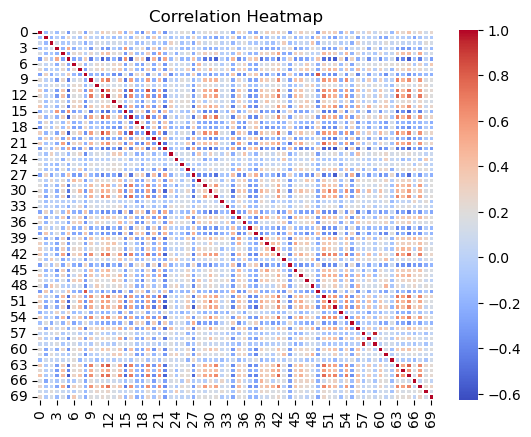

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=0.01)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
correlation_matrix_filtered = correlation_matrix[correlation_matrix.abs() > 0.8]
correlation_matrix_filtered

,0,1,2,3,4,5,6,7,8,9,...,60,61,62,63,64,65,66,67,68,69
0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.802916,NaN,1.0,NaN,NaN,NaN,NaN
66,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
68,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN


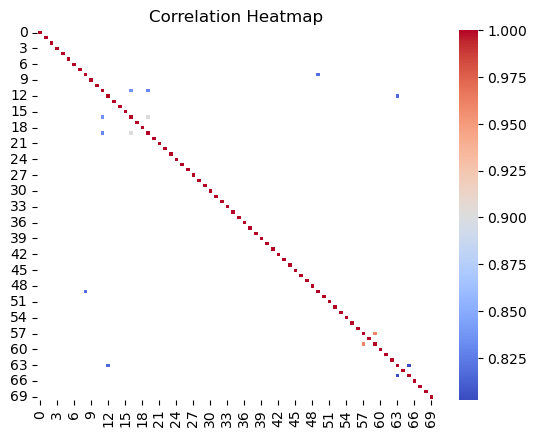

In [ ]:
sns.heatmap(correlation_matrix_filtered, annot=False, cmap='coolwarm', linewidths=0.01)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
features_to_drop = []

for col in correlation_matrix_filtered.columns:
    # Create a boolean mask to select correlated features
    correlated_features = correlation_matrix_filtered.index[correlation_matrix_filtered[col] > 0.8].tolist()
    
    for feature in correlated_features:
        if feature != col and feature not in features_to_drop:
            features_to_drop.append(feature)

# Drop the correlated features from your DataFrame
df_dropped = X_norm.drop(columns=features_to_drop)
print(df_dropped)

           0         1         2         3         4         5         6   \
0    0.294244  0.705043  0.183047  0.610883  0.287570  0.806475  0.179009   
1    0.315761  0.143673  0.263651  0.559548  0.330241  0.630611  0.174344   
2    0.586875  0.397716  0.413937  0.667351  0.285714  0.785136  0.078134   
3    0.481442  0.255947  0.506500  0.377823  0.270872  0.506990  0.232653   
4    0.603012  0.574691  0.433177  0.394251  0.319109  0.431199  0.274052   
..        ...       ...       ...       ...       ...       ...       ...   
391  0.622898  0.306042  0.413515  0.446012  0.430161  0.234592  0.268624   
392  0.939756  0.400465  0.445440  0.411823  0.442294  0.550884  0.249067   
393  0.456591  0.371809  0.250853  0.384196  0.250668  0.718879  0.601500   
394  0.730001  0.326451  0.644449  0.421902  0.304080  0.254319  0.308927   
395  0.390398  0.362003  0.423761  0.447160  0.316800  0.500604  0.683802   

           7         9         10  ...        56        58        60  \
0  

In [ ]:
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(df_dropped, Y, test_size=0.2, random_state=42)

In [ ]:
num_sets = 5
selected_feature_subsets2 = feature_selection_wrapper(X_train2, Y_train2, num_sets)

# Print the selected feature subsets
for i, subset in enumerate(selected_feature_subsets2):
    print(f"Set {i + 1} - Selected Features:", subset)

Set 1 - Selected Features:  message: Optimization terminated successfully.
 success: True
     fun: -0.3607238071435954
       x: [ 9.837e-01  2.774e-02 ...  7.593e-01  4.903e-01]
     nit: 1
    nfev: 13708
Set 2 - Selected Features:  message: Optimization terminated successfully.
 success: True
     fun: -0.36137354830802165
       x: [ 6.678e-01  9.001e-01 ...  8.475e-01  6.669e-01]
     nit: 1
    nfev: 13708
Set 3 - Selected Features:  message: Optimization terminated successfully.
 success: True
     fun: -0.36284178244894244
       x: [ 4.064e-01  6.470e-01 ...  4.253e-01  5.155e-01]
     nit: 1
    nfev: 14501
Set 4 - Selected Features:  message: Optimization terminated successfully.
 success: True
     fun: -0.36168771909247877
       x: [ 1.807e-01  7.857e-01 ...  1.026e-02  7.308e-01]
     nit: 1
    nfev: 13586
Set 5 - Selected Features:  message: Optimization terminated successfully.
 success: True
     fun: -0.36251842007746127
       x: [ 9.673e-01  8.719e-01 ...  5.851e

In [ ]:
top5_features2 = []
for i, subset in enumerate(selected_feature_subsets2):
    top5_features2.append(np.where(subset.x > 0.75)[0])
    print(f"Set {i + 1} ")
    print(f"Selected Features:", np.where(subset.x > 0.75)[0])
    formatted_importance = [f"{imp:.3f}" for imp in subset.x[np.where(subset.x > 0.75)[0]]]
    print(f"Importance ranking:", formatted_importance)
    print(f"Fitness score:", -subset.fun, "\n")

Set 1 
Selected Features: [ 0  2  5  7 12 16 17 18 19 20 21 23 24 27 32 34 37 38 41 42 51 52 58]
Importance ranking: ['0.984', '0.937', '0.837', '0.801', '0.909', '0.761', '0.944', '0.840', '0.837', '0.827', '0.942', '0.894', '0.884', '0.973', '0.756', '0.854', '0.963', '0.910', '0.963', '0.986', '0.794', '0.806', '0.759']
Fitness score: 0.3607238071435954 

Set 2 
Selected Features: [ 1 18 23 26 27 28 38 42 58]
Importance ranking: ['0.900', '0.933', '0.964', '0.959', '0.920', '0.872', '0.836', '0.797', '0.848']
Fitness score: 0.36137354830802165 

Set 3 
Selected Features: [ 2  7 11 15 19 23 29 31 35 36 42 43 51 52 54]
Importance ranking: ['0.947', '0.842', '0.955', '0.864', '0.824', '0.881', '0.791', '0.892', '0.767', '0.785', '0.850', '0.896', '0.761', '0.880', '0.991']
Fitness score: 0.36284178244894244 

Set 4 
Selected Features: [ 1  2  5  9 12 14 20 22 23 24 28 30 32 36 42 44 53 55 56]
Importance ranking: ['0.786', '0.826', '0.812', '0.832', '0.876', '0.765', '0.937', '0.827', '

In [ ]:
for i, features in enumerate(top5_features2):
    lda_classifier = LDA()
    lda_classifier.fit(X_train2.iloc[:, features], Y_train2)
    print(f"Set {i + 1} ")
    print(f"ROC AUC score:", roc_auc_score(Y_test2, lda_classifier.predict_proba(X_test2.iloc[:, features])[:, 1]), "\n")

Set 1 
ROC AUC score: 0.639386189258312 

Set 2 
ROC AUC score: 0.6547314578005115 

Set 3 
ROC AUC score: 0.6962915601023019 

Set 4 
ROC AUC score: 0.6617647058823529 

Set 5 
ROC AUC score: 0.670076726342711 

